<a href="https://colab.research.google.com/github/aansheeagrwal/Deep-Learning/blob/main/transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [35]:
pip install tensorflow_hub

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

# Define input image shape
IMAGE_SHAPE = (224, 224, 3)

# Wrap TF Hub Layer inside a custom keras.Layer
class HubLayerWrapper(tf.keras.layers.Layer):
    def __init__(self, handle):
        super().__init__()
        self.hub_layer = hub.KerasLayer(handle, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)

# Create Sequential model
classifier = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=IMAGE_SHAPE),
    tf.keras.layers.Rescaling(1./255),  # normalize
    HubLayerWrapper("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")
])

# Check the model
classifier.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hub_layer_wrapper_3             │ (None, 1001)           │             0 │
│ (HubLayerWrapper)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
import numpy as np
import PIL.Image
import requests
from io import BytesIO

# Load and preprocess image
img_url = "https://tensorflow.org/images/blogs/serving/cat.jpg"
image = PIL.Image.open(BytesIO(requests.get(img_url).content)).resize((224, 224))
image = np.array(image).astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Predict
predictions = classifier.predict(image)
predicted_class = np.argmax(predictions[0])
print("Predicted class index:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted class index: 819


In [38]:
print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)

TF Version: 2.18.0
TF Hub Version: 0.16.1


In [40]:
import tensorflow as tf
import numpy as np

# Download and load ImageNet labels (1001 classes, index 0 is background)
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)

imagenet_labels = np.array(open(labels_path).read().splitlines())

# Print the label
print("Predicted label:", imagenet_labels[predicted_class])


Predicted label: spotlight


In [41]:
imagenet_labels[819]  # Might return something like: "Siamese cat"


np.str_('spotlight')

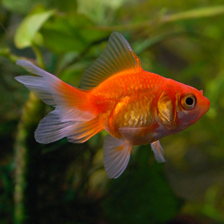

In [44]:
gold_fish = Image.open("goldfish.jpg").resize(Image_Shape)
gold_fish


In [45]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape


(224, 224, 3)

In [46]:
gold_fish[np.newaxis, ...].shape


(1, 224, 224, 3)

In [47]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


(1, 1001)

In [48]:
result


array([[-0.18098238, -0.42397618,  0.8203399 , ..., -0.8990076 ,
        -1.0580363 ,  1.3027383 ]], dtype=float32)

In [49]:
predicted_label_index = np.argmax(result)
predicted_label_index


np.int64(819)

In [51]:
with open("ImageNetLabels.txt","r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [52]:
image_labels[predicted_label_index]

'spotlight'

In [80]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Re-download and extract the dataset
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    origin=dataset_url,
    cache_dir='/tmp/.keras/datasets',  # The directory where the dataset will be stored
    untar=True  # Automatically extract the dataset
)

print("Dataset downloaded and extracted to:", data_dir)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Dataset downloaded and extracted to: /tmp/.keras/datasets/datasets/flower_photos


In [54]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('/tmp/.keras/datasets/flower_photos')

In [55]:
list(data_dir.glob('*.jpg'))[:5]


[]

In [56]:
# List all .jpg files in the flower categories subdirectories
jpg_files = list(data_dir.rglob('*.jpg'))

# Print the list of .jpg files
image_count=len(jpg_files)
image_count


3670

In [57]:
roses=list(data_dir.rglob('roses/*'))
roses[:5]


[PosixPath('/tmp/.keras/datasets/flower_photos/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/flower_photos/roses/4684127262_6c3346188d.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/flower_photos/roses/15032112248_30c5284e54_n.jpg')]

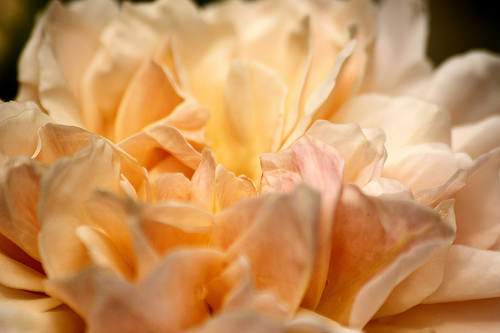

In [58]:
Image.open(str(roses[3]))


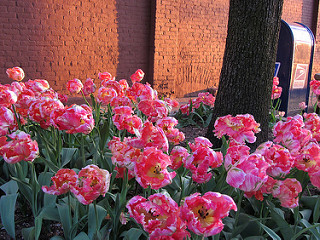

In [59]:
tulips=list(data_dir.rglob('tulips/*'))
Image.open(str(tulips[1]))


In [60]:

flower_images_dic = {
    'roses': list(data_dir.rglob('roses/*')),
    'daisy': list(data_dir.rglob('daisy/*')),
    'dandelion': list(data_dir.rglob('dandelion/*')),
    'sunflowers': list(data_dir.rglob('sunflowers/*')),
    'tulips': list(data_dir.rglob('tulips/*')),
}

In [61]:
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}


In [62]:
img = cv2.imread(str(flower_images_dic['roses'][0]))
img.shape


(240, 320, 3)

In [63]:
cv2.resize(img,Image_Shape).shape

(224, 224, 3)

In [64]:
x,y=[],[]

for flower_name,images in flower_images_dic.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,Image_Shape)
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [65]:
x=np.array(x)
y=np.array(y)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [67]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255


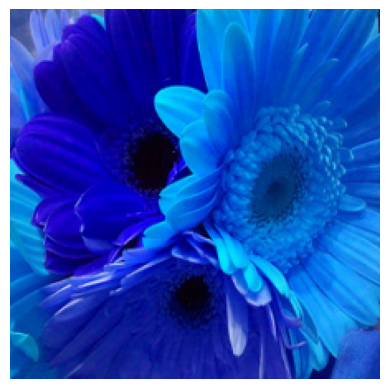

In [68]:
plt.axis('off')
plt.imshow(x[0])


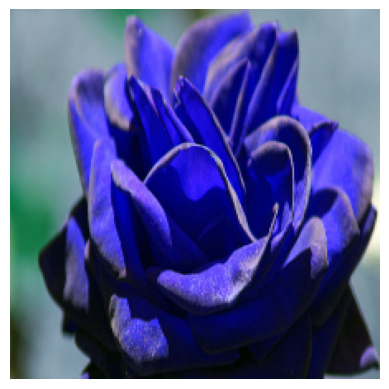

In [69]:
plt.axis('off')
plt.imshow(x[1])


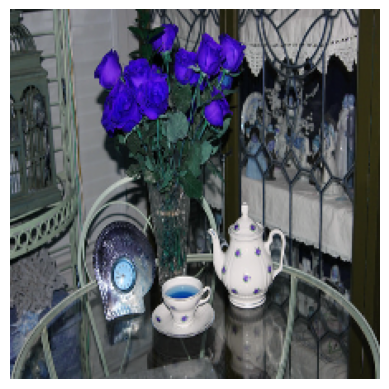

In [70]:
plt.axis('off')
plt.imshow(x[2])

In [71]:
predicted = classifier.predict(np.array([x[0],x[1],x[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([109, 945, 730])

In [72]:
image_labels[795]


'shower curtain'

In [73]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [76]:
import tensorflow as tf
import tensorflow_hub as hub

# Define constants
IMAGE_SHAPE = (224, 224, 3)
num_of_flower = 5

# Wrap the feature extractor
class FeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, hub_url):
        super().__init__()
        self.model = hub.KerasLayer(hub_url, trainable=False)

    def call(self, inputs):
        return self.model(inputs)

# Define model
inputs = tf.keras.Input(shape=IMAGE_SHAPE)
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = FeatureExtractor("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4")(x)
outputs = tf.keras.layers.Dense(num_of_flower, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_10 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_extractor               │ (None, 1280)           │             0 │
│ (FeatureExtractor)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["acc"]
)
model.fit(x_train_scaled,y_train,epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - acc: 0.2083 - loss: 1.6973
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - acc: 0.2370 - loss: 1.5965
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - acc: 0.2811 - loss: 1.5835
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - acc: 0.3329 - loss: 1.5395
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - acc: 0.3363 - loss: 1.5334


In [81]:
model.evaluate(x_test_scaled,y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.3586 - loss: 1.5164


[1.517372488975525, 0.37472766637802124]